# Investigate Spectrogram of Created Music

In [1]:
from __future__ import print_function

import boto3
import librosa
from librosa.display import specshow
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [2]:
PRJ = "/workspace/music-bridge"
DATA_PATH = os.path.join(PRJ, "data")
MIXED_FILENAME = "crazy-skyfall_at_iteration_30.wav"
S3_BUCKET = "tagatune"

In [3]:
s3_client = boto3.client("s3")
mixed_wav_path = os.path.join(DATA_PATH, MIXED_FILENAME)
s3_client.download_file(S3_BUCKET, MIXED_FILENAME, mixed_wav_path)

In [5]:
crazy, sr_c = librosa.core.load("/workspace/music-bridge/data/mix/crazy.wav")
skyfall, sr_s = librosa.core.load("/workspace/music-bridge/data/mix/skyfall.wav")
mixed, sr_m = librosa.core.load("/workspace/music-bridge/data/crazy-skyfall_at_iteration_30.wav")

In [6]:
print("Sample rate:")
print("{} / {} / {}".format(sr_c, sr_s, sr_m))

print("Sample max:")
print("{} / {} / {}".format(crazy.max(), skyfall.max(), mixed.max()))

print("Sample min:")
print("{} / {} / {}".format(crazy.min(), skyfall.min(), mixed.min()))

print("Sample var:")
print("{} / {} / {}".format(crazy.var(), skyfall.var(), mixed.var()))

Sample rate:
22050 / 22050 / 22050
Sample max:
1.27351880074 / 0.98555624485 / 0.999969482422
Sample min:
-1.14606583118 / -0.985242605209 / -0.999969482422
Sample var:
0.103716924787 / 0.0517996475101 / 0.0375461913645


In [7]:
def create_cqt_plot(filename, y, sr):
    CQT = librosa.amplitude_to_db(librosa.cqt(y, sr=sr), ref=np.max)
    plt.figure(figsize=(12, 8), dpi=300)
    plt.subplots()
    librosa.display.specshow(CQT, y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Constant-Q power spectrogram (note)')
    plt.savefig(filename)

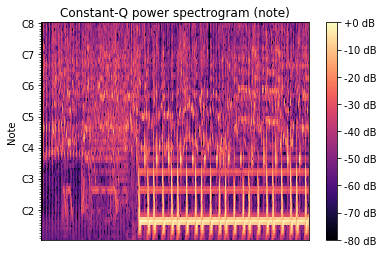

In [12]:
create_cqt_plot(os.path.join(DATA_PATH, 'crazy_cqt.png'), crazy, sr_c)

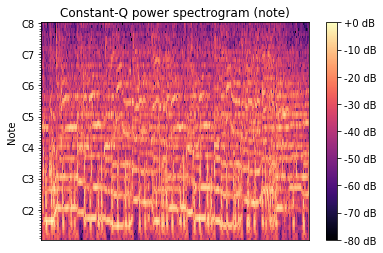

In [13]:
create_cqt_plot(os.path.join(DATA_PATH, 'skyfall_cqt.png'), skyfall, sr_s)

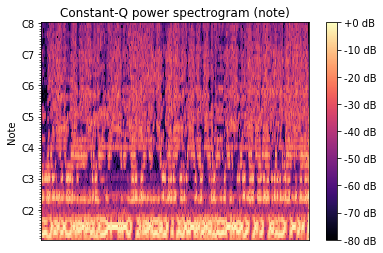

In [8]:
create_cqt_plot(os.path.join(DATA_PATH, 'mixed_cqt.png'), mixed, sr_m)

In [12]:
def display_spectrograms(y, sr):
    plt.figure(figsize=(12, 8))
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Linear-frequency power spectrogram')
    
    plt.subplot(4, 2, 2)
    librosa.display.specshow(D, y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-frequency power spectrogram')
    
    CQT = librosa.amplitude_to_db(librosa.cqt(y, sr=sr), ref=np.max)
    plt.subplot(4, 2, 3)
    librosa.display.specshow(CQT, y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Constant-Q power spectrogram (note)')
    
    plt.subplot(4, 2, 4)
    librosa.display.specshow(CQT, y_axis='cqt_hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Constant-Q power spectrogram (Hz)')

    C = librosa.feature.chroma_cqt(y=y, sr=sr)
    plt.subplot(4, 2, 5)
    librosa.display.specshow(C, y_axis='chroma')
    plt.colorbar()
    plt.title('Chromagram')
    
    plt.subplot(4, 2, 6)
    librosa.display.specshow(D, cmap='gray_r', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Linear power spectrogram (grayscale)')

    plt.subplot(4, 2, 7)
    librosa.display.specshow(D, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log power spectrogram')
    
    plt.subplot(4, 2, 8)
    Tgram = librosa.feature.tempogram(y=y, sr=sr)
    librosa.display.specshow(Tgram, x_axis='time', y_axis='tempo')
    plt.colorbar()
    plt.title('Tempogram')
    plt.tight_layout()


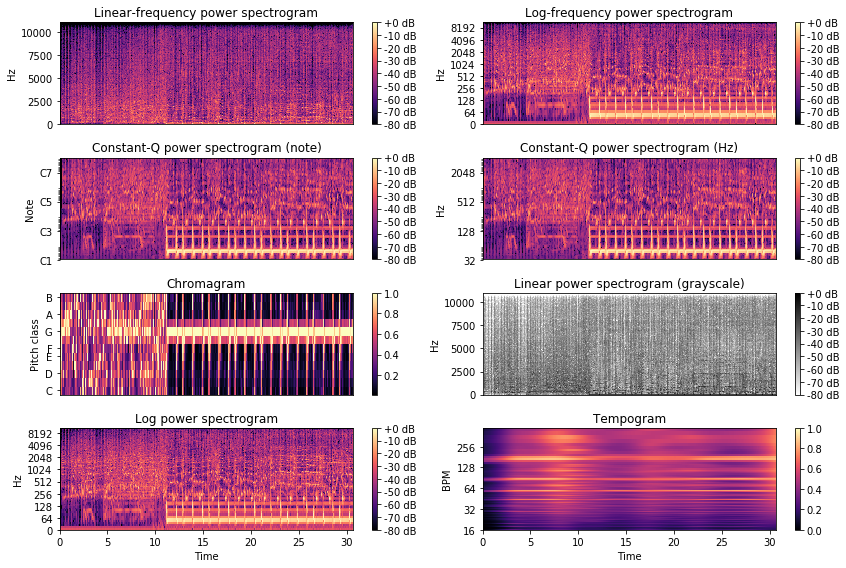

In [13]:
display_spectrograms(crazy, sr_c)

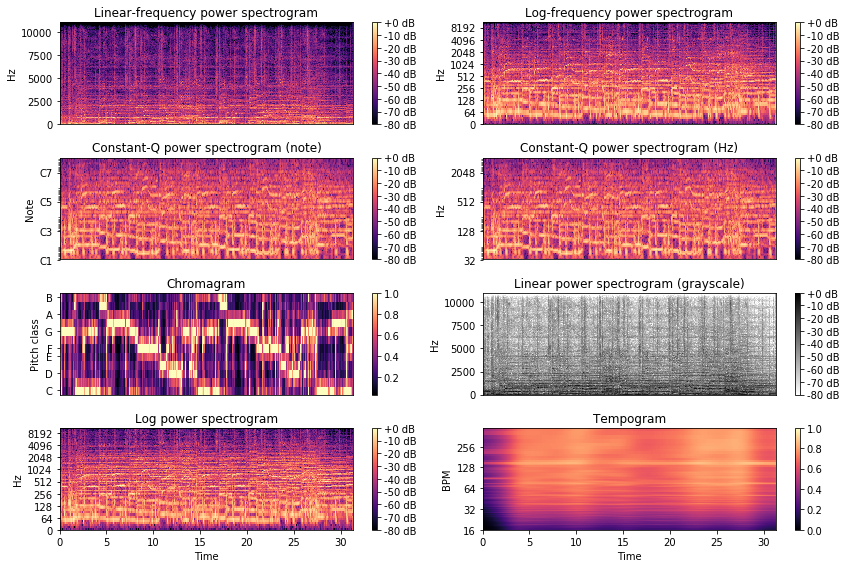

In [14]:
display_spectrograms(skyfall, sr_s)

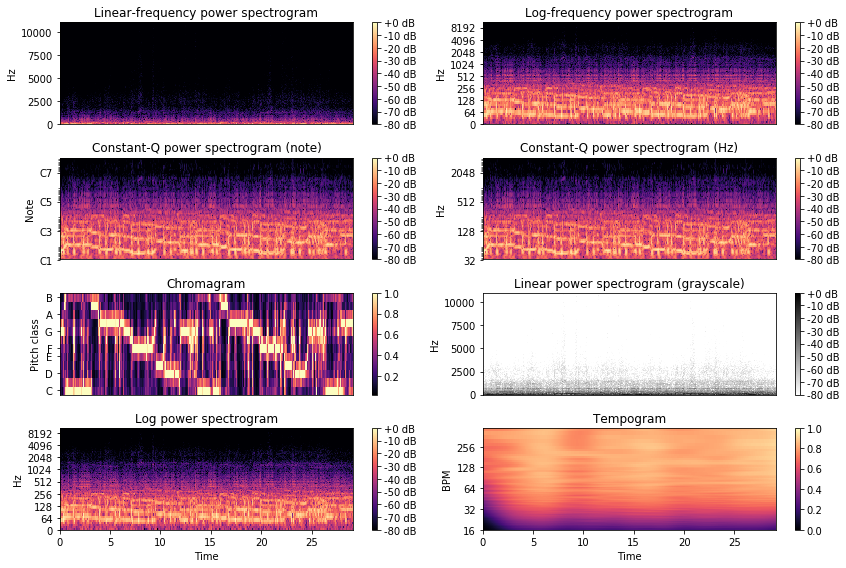

In [15]:
display_spectrograms(mixed, sr_m)